#Milestone-2


##Setup and Initialization


In [ ]:
import pandas as pd
import numpy as np

In [ ]:
file_path = '/content/MachineLearningTestFile.csv'
DATA_COL = ['score', 'id', 'date', 'flag', 'user', 'text']

#Read File
data = pd.read_csv(file_path, names=DATA_COL)

##Data Exploration

In [57]:
#Display head of data
data.head()

,text,score
0,httptwitpiccomyzl awww thats bummer shoulda go...,0
1,upset cant update facebook texting might cry r...,0
2,dived many times ball managed save rest go bounds,0
3,whole body feels itchy like fire,0
4,behaving im mad cant see,0


In [58]:
#Prints attributes of dataset
print('Length of Data is: ', len(data))
print('Shape of Data is: ', data.shape)

Length of Data is:  199
Shape of Data is:  (199, 2)


In [59]:
#Prints data info
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 199 entries, 0 to 198
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    199 non-null    object
 1   score   199 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 3.2+ KB


In [60]:
#Check for missing values
missing_values = data.isnull().sum()
print(missing_values)
#Check for Null Values
null_values = (data.isnull()).sum()
print(null_values)

text     0
score    0
dtype: int64
text     0
score    0
dtype: int64


In [61]:
#Count Scores
data['score'].value_counts()

,count
score,
0,100
4,99


##Plotting Data


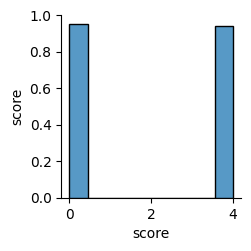

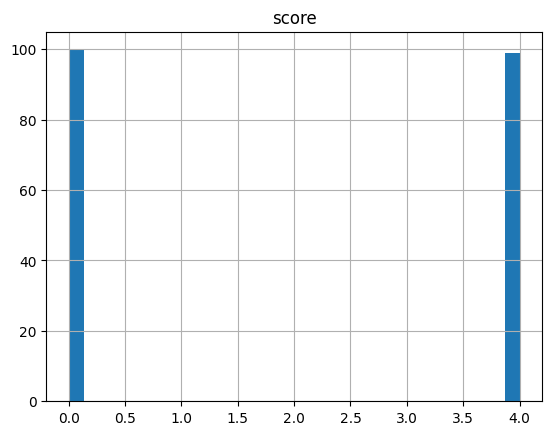

In [62]:
import matplotlib.pyplot as plt
import seaborn as sns

#pairplot
sns.pairplot(data)
plt.show()

#plot distributions
data.hist(bins=30)
plt.show()

#Milestone-3


##Preprocessing Data

In [63]:
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder, PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
import re
#Further Set up Data
data = data[['text', 'score']]

# Cleaning the Data
text = data[['text']]
score = data[['score']]

pos_score = data[data['score'] > 0]
neg_score = data[data['score'] < 0]

dataset = pd.concat([pos_score, neg_score])

stopwords = [
    "i", "me", "my", "myself", "we", "our", "ours", "ourselves",
    "you", "your", "yours", "yourself", "yourselves", "he", "him",
    "his", "himself", "she", "her", "hers", "herself", "it",
    "its", "itself", "they", "them", "their", "theirs", "themselves",
    "what", "which", "who", "whom", "this", "that", "these", "those",
    "am", "is", "are", "was", "were", "be", "been", "being", "have",
    "has", "had", "having", "do", "does", "did", "doing", "a", "an",
    "the", "and", "but", "if", "or", "because", "as", "until", "while",
    "of", "at", "by", "for", "with", "about", "against", "between", "into",
    "through", "during", "before", "after", "above", "below", "to", "from",
    "up", "down", "in", "out", "on", "off", "over", "under", "again",
    "further", "then", "once", "here", "there", "when", "where", "why",
    "how", "all", "any", "both", "each", "few", "more", "most", "other",
    "some", "such", "no", "nor", "not", "only", "own", "same", "so", "than",
    "too", "very", "s", "t", "can", "will", "just", "don", "should", "now"
    ]

###Clean Data Function

In [64]:
def clean_data(text):
  text = text.str.lower()
  # Convert to lowercase
  text = text.str.lower()
  #Remove Usernames
  text = text.apply(lambda x: re.sub(r'@\w+', '', x))
  # Remove special characters and numbers
  text = text.apply(lambda x: re.sub(r'[^a-zA-Z\s]', '', x))
  # Remove extra spaces
  text = text.apply(lambda x: re.sub(r'\s+', ' ', x))
  # Remove stopwords
  text = text.apply(lambda x: ' '.join([word for word in x.split() if word not in stopwords]))
  return text

###Finalize Preprocessing

In [65]:
# Apply the cleaning function to the 'text' column
data['text'] = clean_data(data['text'])

# Vectorize the cleaned text
vectorizer = TfidfVectorizer(max_features=5000)
X = vectorizer.fit_transform(data['text']).toarray()

# Scale the features
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

# Encode the target variable
y = data['score']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

###Finalized Data Information

In [66]:
# Display the shape
print('Training data shape:', X_train.shape)
print('Test data shape:', X_test.shape)
print('Training labels shape:', y_train.shape)
print('Test labels shape:', y_test.shape)

Training data shape: (159, 947)
Test data shape: (40, 947)
Training labels shape: (159,)
Test labels shape: (40,)


##Train First Model

In [67]:
#test model
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, confusion_matrix, classification_report

# Create a logistic regression model
model = LogisticRegression()

# Train the model
model.fit(X_train, y_train)

# Make predictions on the test set
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

##Training vs. Test Error

In [68]:
#Comparing Accuracy Scores
print("Train Accuracy:", train_accuracy)
print("Test Accuracy:", test_accuracy)

#Comparing Classification Reports
print("Train Classification Report:")
print(classification_report(y_train, y_train_pred))
print("Test Classification Report:")
print(classification_report(y_test, y_test_pred))

#Comparing Confusion Matrixes
print("Train Confusion Matrix:")
print(confusion_matrix(y_train, y_train_pred))
print("Test Confusion Matrix:")
print(confusion_matrix(y_test, y_test_pred))

Train Accuracy: 1.0
Test Accuracy: 0.575
Train Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        79
           4       1.00      1.00      1.00        80

    accuracy                           1.00       159
   macro avg       1.00      1.00      1.00       159
weighted avg       1.00      1.00      1.00       159

Test Classification Report:
              precision    recall  f1-score   support

           0       0.59      0.62      0.60        21
           4       0.56      0.53      0.54        19

    accuracy                           0.57        40
   macro avg       0.57      0.57      0.57        40
weighted avg       0.57      0.57      0.57        40

Train Confusion Matrix:
[[79  0]
 [ 0 80]]
Test Confusion Matrix:
[[13  8]
 [ 9 10]]
